In [7]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from rerf.rerfClassifier import rerfClassifier
from rerf.RerF import fastPredict, fastPredictPost, fastRerF


In [65]:
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape)


random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(70000, 784)
(70000, 784)


In [59]:
patchSize = np.arange(1, 14)
print(patchSize)

print(len(X))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
70000


In [56]:
scores = [];

for i in patchSize:

    clf_s_rerf = rerfClassifier(projection_matrix="S-RerF",
                                 image_height=28,
                                 image_width=28,
                                 n_estimators=100,
                                 patch_height_min=1,
                                 patch_width_min=1,
                                 patch_height_max=i,
                                 patch_width_max=i,
                                 n_jobs=1,
                               )
    clf_s_rerf.fit(X_train, y_train)
    scores.append(clf_s_rerf.score(X_test, y_test.astype(int)))
    

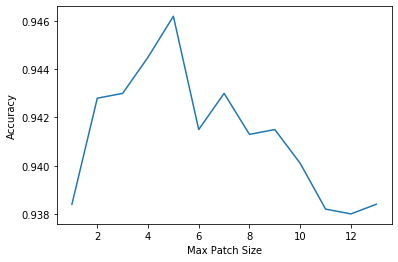

In [58]:
plt.figure()
plt.plot(patchSize, scores)
plt.xlabel("Max Patch Size")
plt.ylabel("Accuracy")
plt.show()